# CUSTOMER CHURN PREDICTION
 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np


In [2]:
path = os.getcwd()
file = path + "\Churn_Modelling.csv"
file

'C:\\Users\\Delip\\customer_chun\\Churn_Modelling.csv'

In [3]:
df = pd.read_csv(file)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

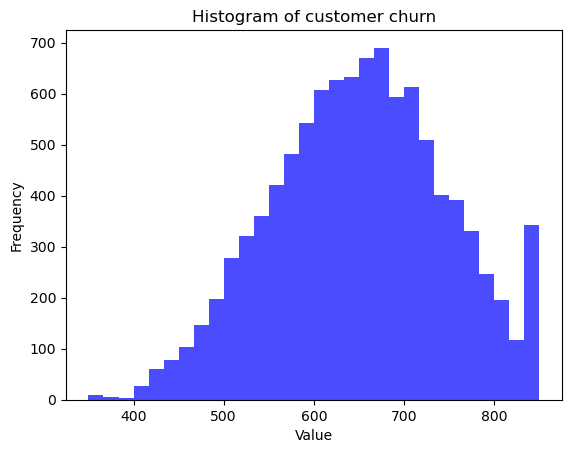

In [8]:
plt.hist(df['CreditScore'], bins=30, alpha=0.7, color='blue')
plt.title("Histogram of customer churn")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

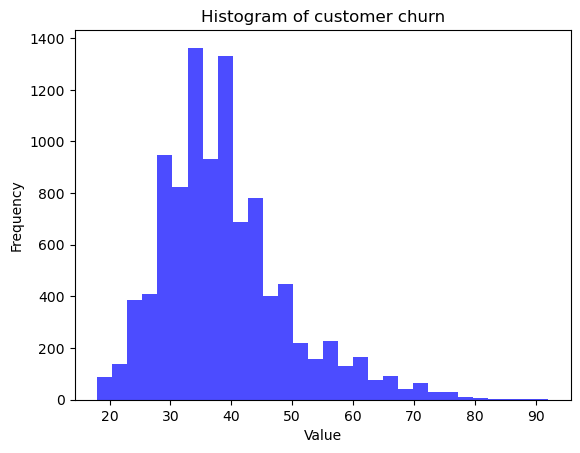

In [9]:
plt.hist(df['Age'], bins=30, alpha=0.7, color='blue')
plt.title("Histogram of customer churn")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

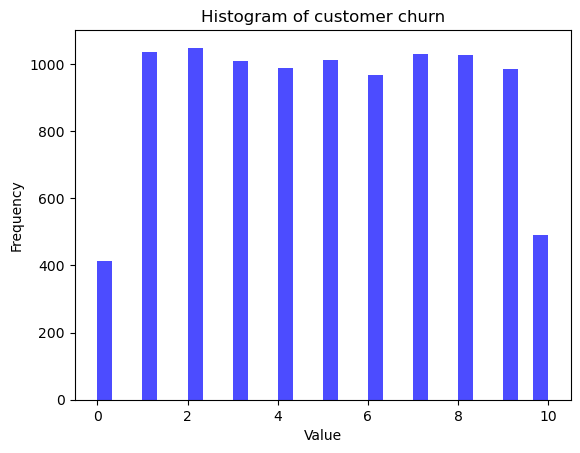

In [10]:
plt.hist(df['Tenure'], bins=30, alpha=0.7, color='blue')
plt.title("Histogram of customer churn")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [11]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
df.drop(['Surname','Geography','Gender','HasCrCard'], axis=1, inplace=True)
df

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,0,96270.64,0
9996,9997,15569892,516,35,10,57369.61,1,1,101699.77,0
9997,9998,15584532,709,36,7,0.00,1,1,42085.58,1
9998,9999,15682355,772,42,3,75075.31,2,0,92888.52,1


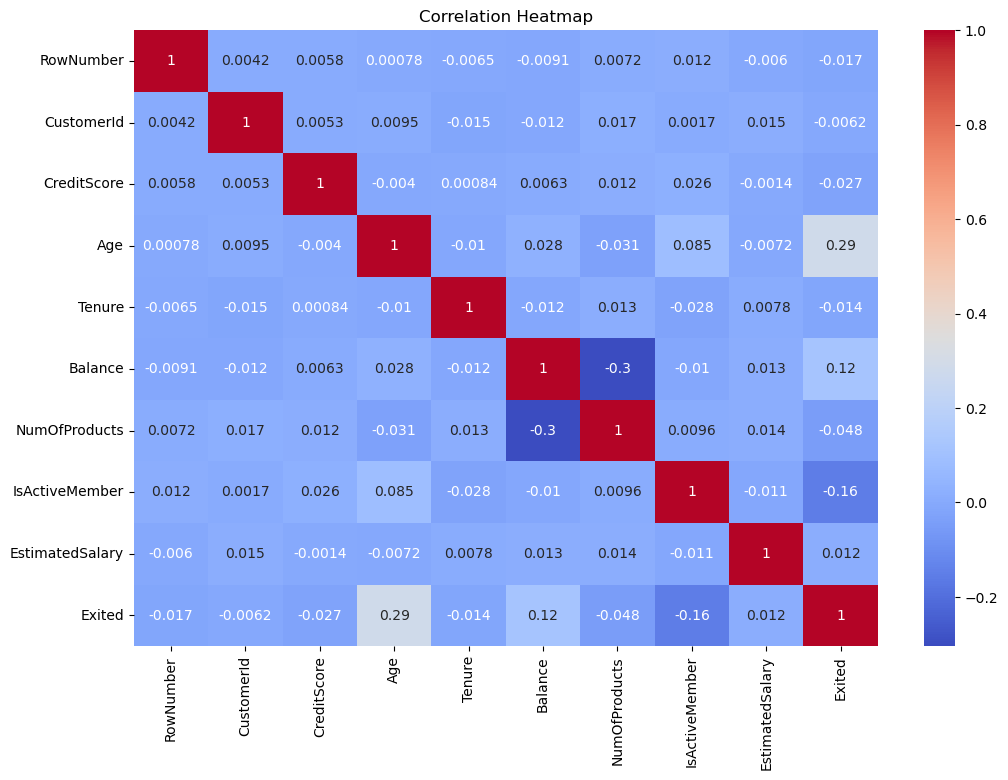

In [13]:
correlation_matrix = df.corr()
 
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
df.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

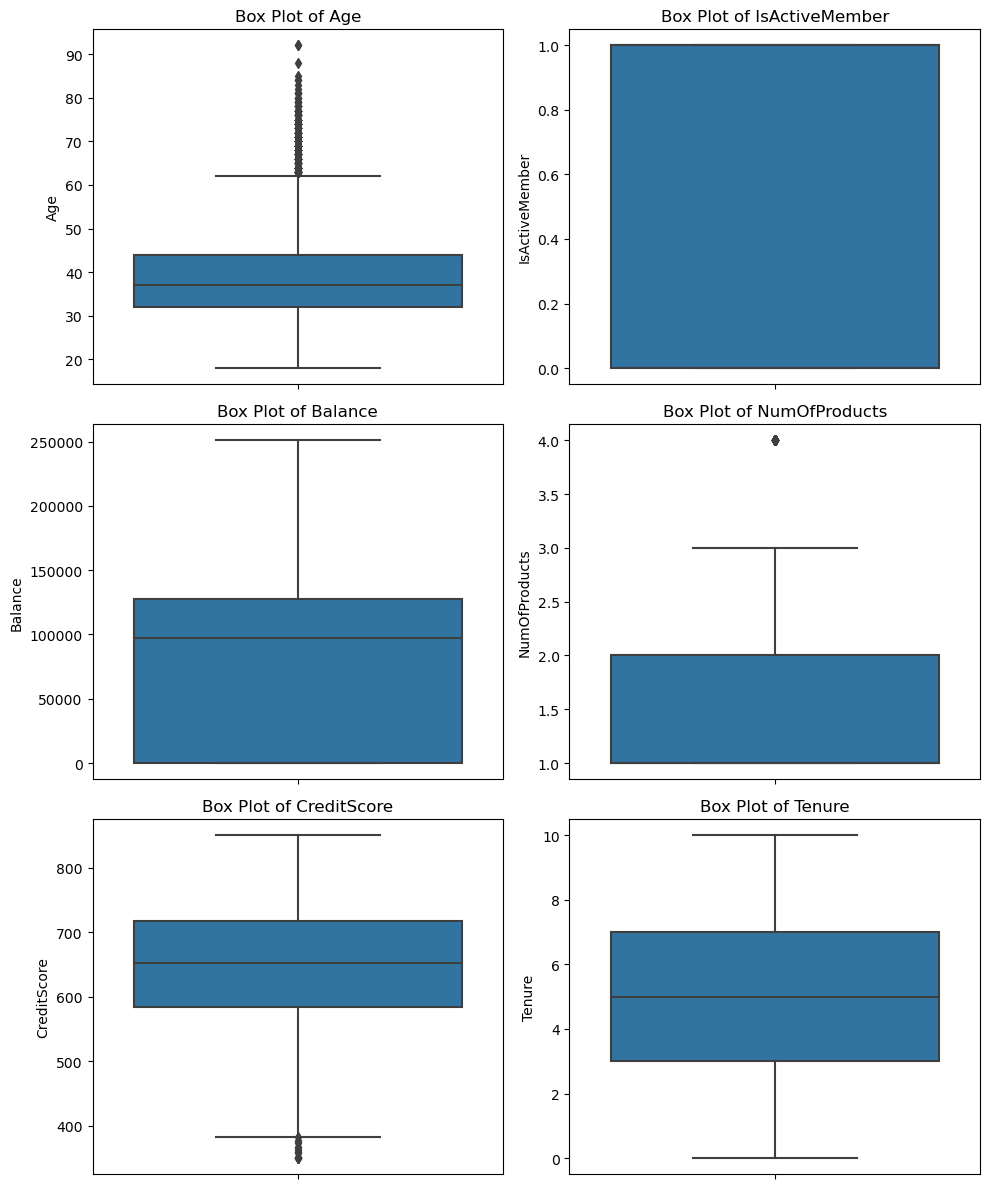

In [15]:
df1=df[['Age','IsActiveMember','Balance','NumOfProducts','CreditScore','Tenure']]
plt.figure(figsize=(10, 12))
for i, var in enumerate(df1.columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=var, data=df1)
    plt.title(f'Box Plot of {var}')
plt.tight_layout()
plt.show()

In [16]:
Q1 = np.percentile(df.Age, 25)
Q3 = np.percentile(df.CreditScore, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df.Age < lower_bound) | (df.CreditScore > upper_bound)]
outliers[['Age','CreditScore']].head()

,Age,CreditScore


In [17]:
outliers.shape

(0, 10)

In [18]:
def cap_outliers(df1, lower_threshold, upper_threshold):
    capped_data = np.clip(df1, lower_threshold, upper_threshold)
    return capped_data
 
capped_data = cap_outliers(df1.Age, lower_bound, upper_bound)
capped_data
df.loc[:,'Age'] = capped_data
df.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,79084.10,0


In [19]:
outliers.shape

(0, 10)

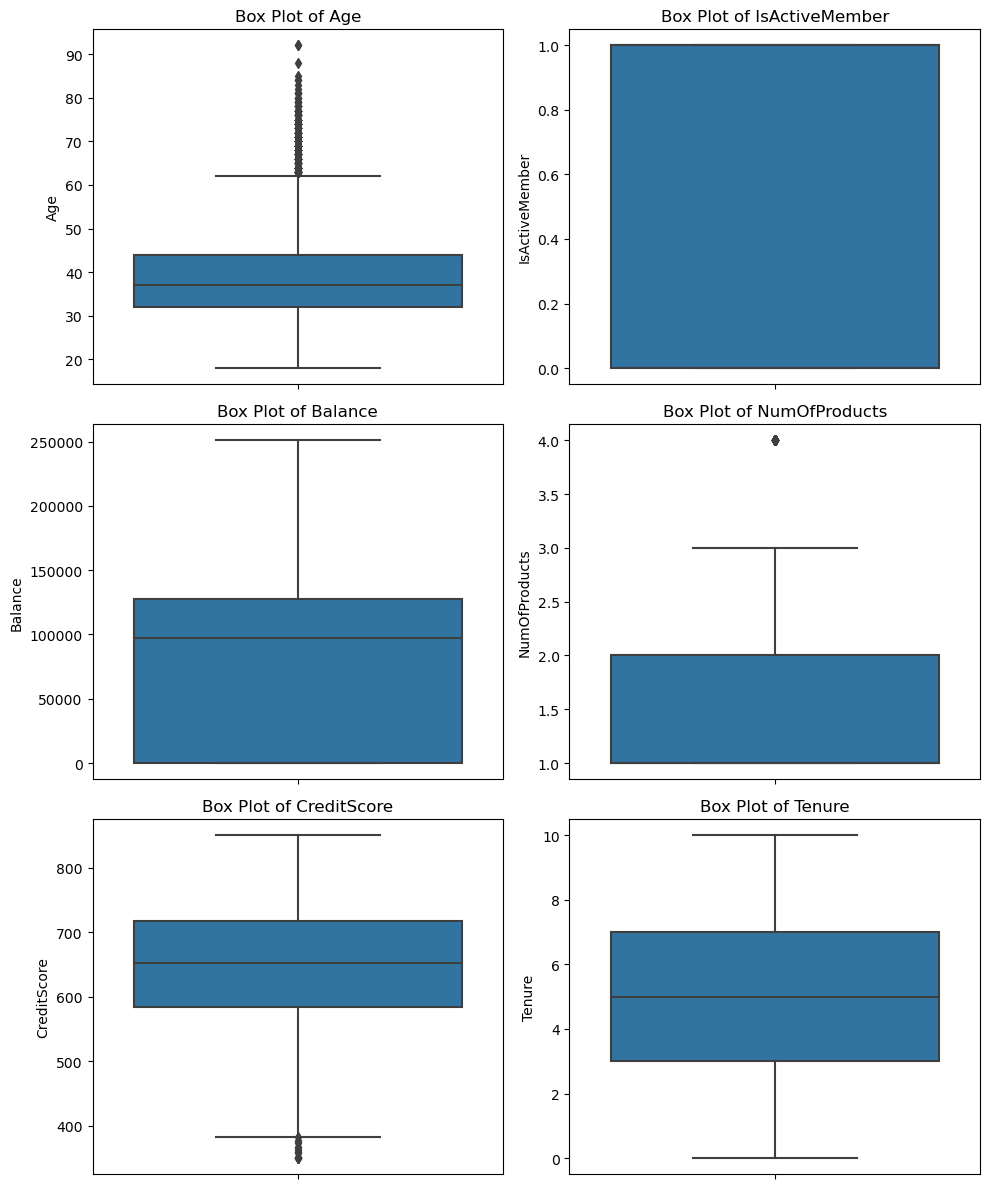

In [20]:
plt.figure(figsize=(10, 12))
for i, var in enumerate(df1.columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=var, data=df1)
    plt.title(f'Box Plot of {var}')
plt.tight_layout()
plt.show()

In [21]:
df.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [22]:
tv='Exited'
prec=['Age','IsActiveMember','Balance','NumOfProducts','CreditScore','Tenure']

x=df[prec].values
y=df[tv].values

from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.3,random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
prs=MinMaxScaler()
prsf=prs.fit(x)
x=prsf.transform(x)

from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.3,random_state=42)

In [24]:
print(x_tr.shape)
print(y_tr.shape)
print(x_te.shape)
print(y_te.shape)

(7000, 6)
(7000,)
(3000, 6)
(3000,)


# Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [27]:
model.fit(x_tr,y_tr)

RandomForestRegressor(random_state=42)

In [28]:
y_pred =model.predict(x_te)

In [29]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_te, y_pred)
print("Mean Squared Error:", mse)
from sklearn import metrics

print('r2 value',metrics.r2_score(y_tr,model.predict(x_tr)))

Mean Squared Error: 0.11622456666666667
r2 value 0.8980546021602793


# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
odel=LogisticRegression()

In [31]:
odel.fit(x_tr,y_tr)

LogisticRegression()

In [32]:
y_pred =odel.predict(x_te)

In [33]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_te, y_pred)
print("Mean Squared Error:", mse)
from sklearn import metrics

print('r2 value',metrics.r2_score(y_tr,odel.predict(x_tr)))

Mean Squared Error: 0.18733333333333332
r2 value -0.18725162972588238


# KNeighbors Regression

In [34]:

from sklearn.neighbors import KNeighborsRegressor
el = KNeighborsRegressor()

In [35]:
el.fit(x_tr,y_tr)

KNeighborsRegressor()

In [36]:
y_pred =el.predict(x_te)

In [37]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_te, y_pred)
print("Mean Squared Error:", mse)
from sklearn import metrics

print('r2 value',metrics.r2_score(y_tr,el.predict(x_tr)))

Mean Squared Error: 0.12474666666666667
r2 value 0.4808401359290829


In [38]:
df.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,79084.10,0


In [39]:
Age=39
IsActiveMember=1
Balance=237879.89
NumOfProducts=4
CreditScore=873
Tenure=8

y_p=model.predict([[Age,IsActiveMember,Balance,NumOfProducts,CreditScore,Tenure]])
print(f"chances of getting the customer will exit the company:", y_p)

chances of getting the customer will exit the company: [0.36]


# Converting to pickle

In [40]:
import pickle

pickle.dump(odel, open("Diabetes.sav", "wb"))
model = pickle.load(open("Diabetes.sav", "rb"))

#Age=29
#IsActiveMember=1
#Balance=253456.00
#NumOfProducts=4
#CreditScore=891
#Tenure=10

#y_p=model.predict([[Age,IsActiveMember,Balance,NumOfProducts,CreditScore,Tenure]])
#print(f"chances of getting the customer will exit the company:", y_p)

In [41]:
#!streamlit run printy.py